# Protocolo "Dual Basis Measurement"

O protocolo “Dual Basis Measurement” utiliza o princípio da superposição e medição de qubits para assegurar segurança e privacidade. A sua principal característica é a utilização de duas bases de medição não ortogonais, como  as bases de computação |0⟩ e |1⟩, e a porta Hadamard, também conhecida na criptografia quântica como protocolo BB84.

O protocolo consiste em três etapas principais: na preparação, uma autoridade eleitoral prepara um qubit para cada eleitor. A informação do voto fica codificada no qubit, porém em uma base de medição secreta. Dessa forma, o voto executado pelo eleitor (que pode ser |0⟩ para “Não” e |1⟩ para “Sim”) fica em uma base que só ele e a autoridade conhecem.

Na fase de votação, o eleitor recebe o qubit designado e tem a possibilidade de reverter ou manter o estado do qubit, sem saber a base secreta, para decidir e expressar o seu voto. Com o recebimento dos votos dos eleitores, o centro de contagem medirá os qubits na base apropriada, sendo revelados apenas após a fase de votação.

A principal vantagem desse protocolo é a garantia da segurança pelo Teorema da Não-Clonagem, que impossibilita a cópia de um estado quântico desconhecido. Isso é importante para prevenir a fraude de votos, porque se um invasor tentar interceptar e medir o qubit para descobrir o voto, ele irá alterá-lo de forma irreversível, e a tentativa será detectada.


In [ ]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 86.2 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# -- FASE 1: PREPARAÇÃO DO CENÁRIO --
ELEITORES = 10
VOTOS_SIM = 8
VOTOS_NAO = ELEITORES - VOTOS_SIM

lista_votos = [1]*VOTOS_SIM + [0]*VOTOS_NAO

print("-- Dados do cenário --")
print(f"Eleitores: {ELEITORES}")
print(f"Votos SIM reais: {VOTOS_SIM}")
print(f"Lista de votos: {lista_votos}")

-- Dados do cenário --
Eleitores: 10
Votos SIM reais: 8
Lista de votos: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]


In [ ]:
# -- FASE 2: CIRCUITO QUÂNTICO --

dbm = QuantumCircuit(ELEITORES, ELEITORES)

# O voto será armazenado em uma base secreta conhecida apenas pelo eleitor e pela autoridade. (0 = Z, 1 = X)
base_secreta = np.random.randint(2, size=ELEITORES)
print(base_secreta)

dbm.barrier(label="|0>")

for i in range(ELEITORES):
  if lista_votos[i] == 1:
    dbm.x(i)

dbm.barrier(label="Votação")

for i in range(ELEITORES):
  if base_secreta[i] == 1:
    dbm.h(i)

  dbm.measure(i, i)

print("-- Circuito quântico --")
print(dbm.draw())

[1 0 0 0 0 0 0 1 0 1]
-- Circuito quântico --
       |0> ┌───┐ Votação ┌───┐                         ┌─┐      
 q_0: ──░──┤ X ├────░────┤ H ├─────────────────────────┤M├──────
        ░  ├───┤    ░    └┬─┬┘                         └╥┘      
 q_1: ──░──┤ X ├────░─────┤M├───────────────────────────╫───────
        ░  ├───┤    ░     └╥┘ ┌─┐                       ║       
 q_2: ──░──┤ X ├────░──────╫──┤M├───────────────────────╫───────
        ░  ├───┤    ░      ║  └╥┘┌─┐                    ║       
 q_3: ──░──┤ X ├────░──────╫───╫─┤M├────────────────────╫───────
        ░  ├───┤    ░      ║   ║ └╥┘┌─┐                 ║       
 q_4: ──░──┤ X ├────░──────╫───╫──╫─┤M├─────────────────╫───────
        ░  ├───┤    ░      ║   ║  ║ └╥┘┌─┐              ║       
 q_5: ──░──┤ X ├────░──────╫───╫──╫──╫─┤M├──────────────╫───────
        ░  ├───┤    ░      ║   ║  ║  ║ └╥┘┌─┐           ║       
 q_6: ──░──┤ X ├────░──────╫───╫──╫──╫──╫─┤M├───────────╫───────
        ░  ├───┤    ░      ║   ║  ║  ║  ║ └╥

Resultado da simulação:  {'0001111111': 57, '0011111110': 65, '1011111110': 58, '1001111111': 51, '1001111110': 70, '0011111111': 63, '1011111111': 68, '0001111110': 68}


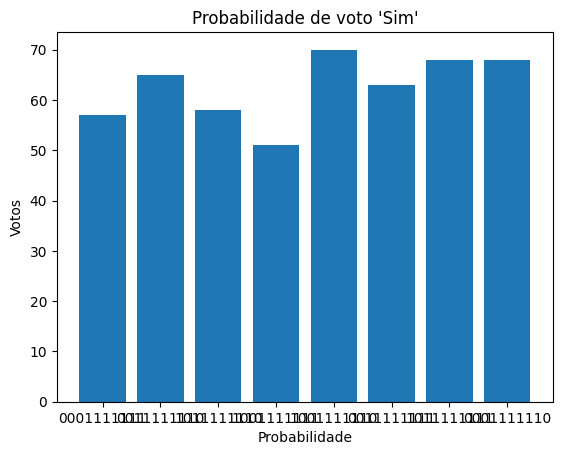

In [ ]:
# -- FASE 3: SIMULAÇÃO --

SHOTS = 500

sim = AerSimulator()
job = sim.run(dbm, shots=SHOTS)
result = job.result()
counts = result.get_counts()

print("Resultado da simulação: ", counts)
plot_histogram(counts)

plt.title("Probabilidade de voto 'Sim'")
plt.xlabel("Probabilidade")
plt.ylabel("Votos")
plt.bar(counts.keys(), counts.values())
plt.show()

In [ ]:
# -- FASE 4: APURAÇÃO --

# Utilizando como base o cenário inicial
medicao_string = list(counts.keys())[0]
medicao_bits = [int(bit) for bit in reversed(medicao_string)]

print("Cenário de referência: ")
print(medicao_bits)
print()

votos_apurados_sim = 0
votos_descartados = 0

for i in range(ELEITORES):
  if base_secreta[i] == 0:
    if medicao_bits[i] == 1:
      votos_apurados_sim += 1
  else:
    votos_descartados += 1

print("-- Apuração final --")
print(f"Votos SIM estimados: {votos_apurados_sim}")
print(f"Votos SIM reais: {VOTOS_SIM}")
print(f"Votos descartados: {votos_descartados}")
# Conclusão: devido a ataques em potencial de invasores, alguns votos foram descartados.
# Aprox. 50% são descartados e enviados para auditoria.


Cenário de referência: 
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

-- Apuração final --
Votos SIM estimados: 6
Votos SIM reais: 8
Votos descartados: 3
